# Plotting Equipotential Curves and Streamlines
This notebook introduces Matplotlib to allow visualization of equipotential curves, streamlines, and velocity fields. The cells are designed to be run in order.

## The NumPy Library
The NumPy library provides useful functionality for performing mathematical operations and computations on arrays, or lists of numbers. It may be used in a program through the following import statement:

In [1]:
import numpy as np # it is frequently aliased as 'np' so that we don't have to type the whole name.

We will also import the `cmath` library covered in `complex_numbers.ipynb`

In [2]:
import cmath as cm

The cells below illustrate how NumPy arrays work, and how they compare to normal Python lists. Note how the `.` operator is used to call specific functions within the numpy library, such as `array`, `linspace` and `arange`. 

In [5]:
# a Python list:
a = [1, 2, 3, 4, 5]

# Numpy arrays:
# from the python list
A = np.array(a)
# from a function:
b = np.arange(6, 11, 1) # arguments are start, stop_before, and step. stop_before = stop + step

## what happens to the ordinary list v. the numpy arrays?
print('3a+b =', 3*a+list(b)) # here b is cast as a list, or its type and behavior are changed
print('3A+b =', 3*A+b)

3a = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
3A+b = [ 9 13 17 21 25]


This element-wise behavior of numpy arrays makes them useful for computations

In [8]:
# create an array to be the x-variable
x = np.linspace(0, 10, 21) # arguments: start, stop, number of values in between

# evaluate some functions for each x:
y1 = x
y2 = x**2 - 1

print('y1 =', y1)
print('y2 =', y2)

y1 = [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
y2 = [-1.   -0.75  0.    1.25  3.    5.25  8.   11.25 15.   19.25 24.   29.25
 35.   41.25 48.   55.25 63.   71.25 80.   89.25 99.  ]


Numpy provides all the typical mathematical functions through the dot operator:

In [9]:
np.sin(x)

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
        0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
       -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,
        0.93799998,  0.98935825,  0.79848711,  0.41211849, -0.07515112,
       -0.54402111])

In [10]:
np.cos(x)

array([ 1.        ,  0.87758256,  0.54030231,  0.0707372 , -0.41614684,
       -0.80114362, -0.9899925 , -0.93645669, -0.65364362, -0.2107958 ,
        0.28366219,  0.70866977,  0.96017029,  0.97658763,  0.75390225,
        0.34663532, -0.14550003, -0.6020119 , -0.91113026, -0.99717216,
       -0.83907153])

In [11]:
np.log(x) # this is the natural logarithm

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf, -0.69314718,  0.        ,  0.40546511,  0.69314718,
        0.91629073,  1.09861229,  1.25276297,  1.38629436,  1.5040774 ,
        1.60943791,  1.70474809,  1.79175947,  1.87180218,  1.94591015,
        2.01490302,  2.07944154,  2.14006616,  2.19722458,  2.2512918 ,
        2.30258509])

In [12]:
np.log10(x) # common log, or log base 10, log base 2 is also available.

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


array([       -inf, -0.30103   ,  0.        ,  0.17609126,  0.30103   ,
        0.39794001,  0.47712125,  0.54406804,  0.60205999,  0.65321251,
        0.69897   ,  0.74036269,  0.77815125,  0.81291336,  0.84509804,
        0.87506126,  0.90308999,  0.92941893,  0.95424251,  0.97772361,
        1.        ])

In [13]:
# range is [pi/2, -pi/2]
np.arctan(y2/x)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([-1.57079633, -0.98279372,  0.        ,  0.69473828,  0.98279372,
        1.12637712,  1.21202566,  1.26917728,  1.31019394,  1.34115388,
        1.36540094,  1.38493238,  1.40101805,  1.41450569,  1.42598383,
        1.43587443,  1.44448821,  1.45205925,  1.45876736,  1.46475304,
        1.47012767])

In [14]:
# here is a variant of arctangent we will find particularly useful:
# it corrects for which quadrant the ratio is in and delivers a value on the interval (-pi, pi]
np.arctan2(y2, x) # arguments (numerator, denominator)

array([-1.57079633, -0.98279372,  0.        ,  0.69473828,  0.98279372,
        1.12637712,  1.21202566,  1.26917728,  1.31019394,  1.34115388,
        1.36540094,  1.38493238,  1.40101805,  1.41450569,  1.42598383,
        1.43587443,  1.44448821,  1.45205925,  1.45876736,  1.46475304,
        1.47012767])

One final useful function in numpy is `vectorize` which takes a normal Python function and turns it into a function that works like numpy functions on arrays. The code below is an example of vectorizing a `cmath` funtion. This means the output of the function will be numpy's version of complex numbers, but `.real`, `.imag`, and `.conjugate()` still work the same as for basic complex numbers.

In [9]:
cmlog = np.vectorize(cm.log)

z = np.linspace(-5, 5, 10)
print(cmlog(z)) # note how negative values are handled.
# compare to the normal numpy log funciton:
print(np.log(z))

[ 1.60943791+3.14159265j  1.35812348+3.14159265j  1.02165125+3.14159265j
  0.51082562+3.14159265j -0.58778666+3.14159265j -0.58778666+0.j
  0.51082562+0.j          1.02165125+0.j          1.35812348+0.j
  1.60943791+0.j        ]
[        nan         nan         nan         nan         nan -0.58778666
  0.51082562  1.02165125  1.35812348  1.60943791]


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


## The Matplotlib library
Matplotlib provides functionality for graphing functions or data. Here we will demonstrate how it may be used to plot quantities related to groundwater flow. We will be using one of the sub-libraries of Matplotlib, Pyplot, in this Notebook. As with the functions in the NumPy module, Pyplot is accessed using the dot operator `.`.

In [2]:
import matplotlib.pyplot as plt

# line below for displaying plots properly in Jupyter Notebooks
%matplotlib inline
plt.style.use('seaborn-white') # style choice which governs plot colors, font sizes, etc. There are lots of options.

The cell below illustrates some of the basic concepts of plotting

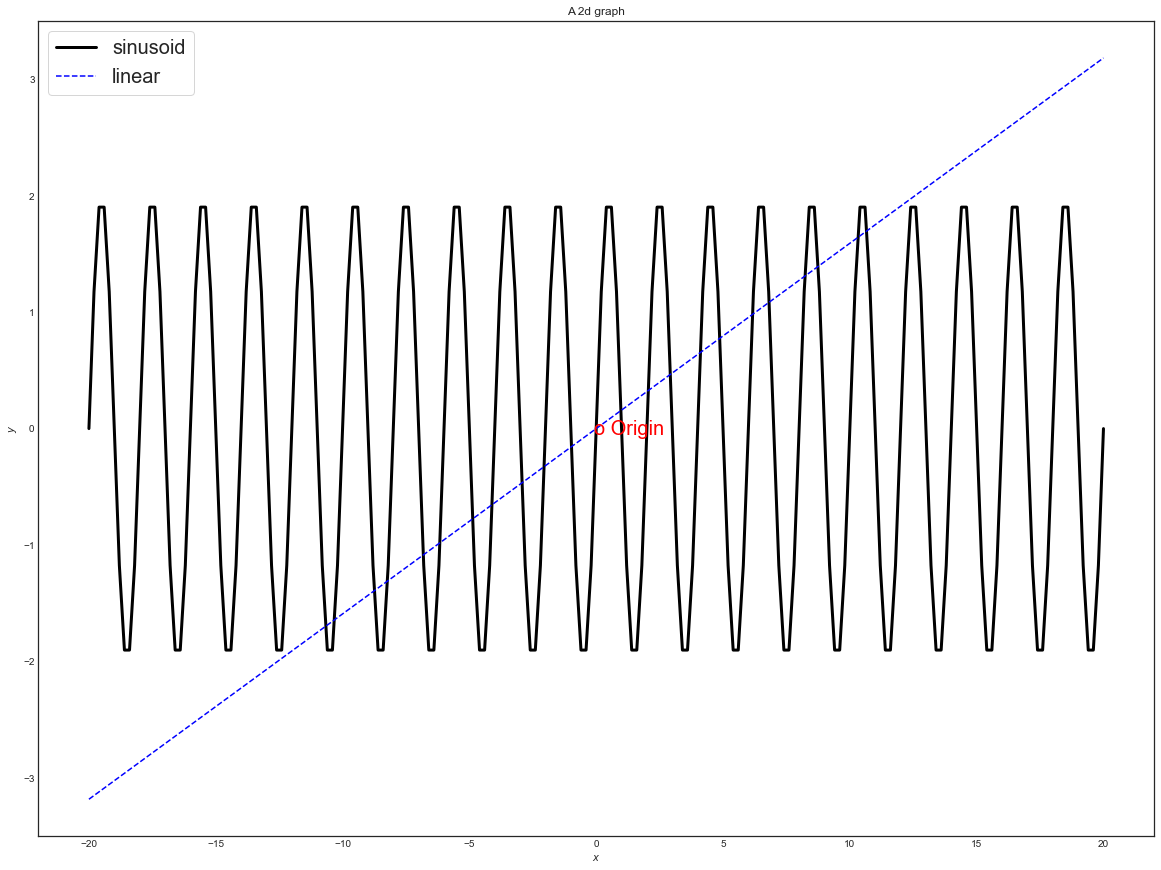

In [24]:
# create data to use:
# here we overwrite x, y1, and y2 from earlier, which is maybe not best practice.
x = np.linspace(-20, 20, 201)
y1 = 2*np.sin(np.pi*x) # note the use of np.pi for the constant 3.14159...
y2 = x/2/np.pi

# begin plot by creating a new figure, with size in inches as (width, height)
fig = plt.figure(figsize=(20, 15))
# the figure commmand creates and returns a figure object, which also has an 
# axes object on it. The axes object is automatically drawn on with the commands below

plt.plot(x, y1, 'k-', linewidth=3, label='sinusoid')
# this will plot y1 v. x using a black solid line (thus the string 'k-'). Plot also has a variety of keyword
# arguments like 'linewidth' that can adjust the style of the plot, including the 'color' and 'linestyle'
plt.plot(x, y2, 'b--', label='linear') # successive commands add to the same axes.

# add some labels, a title, and a legend
plt.legend(fontsize=20, frameon=True, framealpha=0.8) # labels are already made with plot commands
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.title('A 2d graph')

# putting a label at the origin. First two arguments are (x,y) of bottom left corner of text box
plt.text(-0.1,-0.05,'o Origin',color='r',size=20); # to suppress output of last line use ";"

## Graphing contours
Now that we have some of the basics of both Numpy and Matplotlib, we will turn our attention to graphing contours. The equipotentials and streamlines are simple contours of the velocity potential and streamline function, respectively.

We will begin with a fairly simple situation, and leave the more interesting graphs for the exercises. The cell below plots the equipotentials and streamlines for uniform flow in the $+x$-direction with a monitoring well at (-1, -1), represented by the complex potential
\begin{equation}
\Omega = -z
\end{equation}
or
\begin{equation}
    \begin{array}[rcl] \\
        \Phi & = & -x \\
        \Psi & = & -y
    \end{array}
\end{equation}


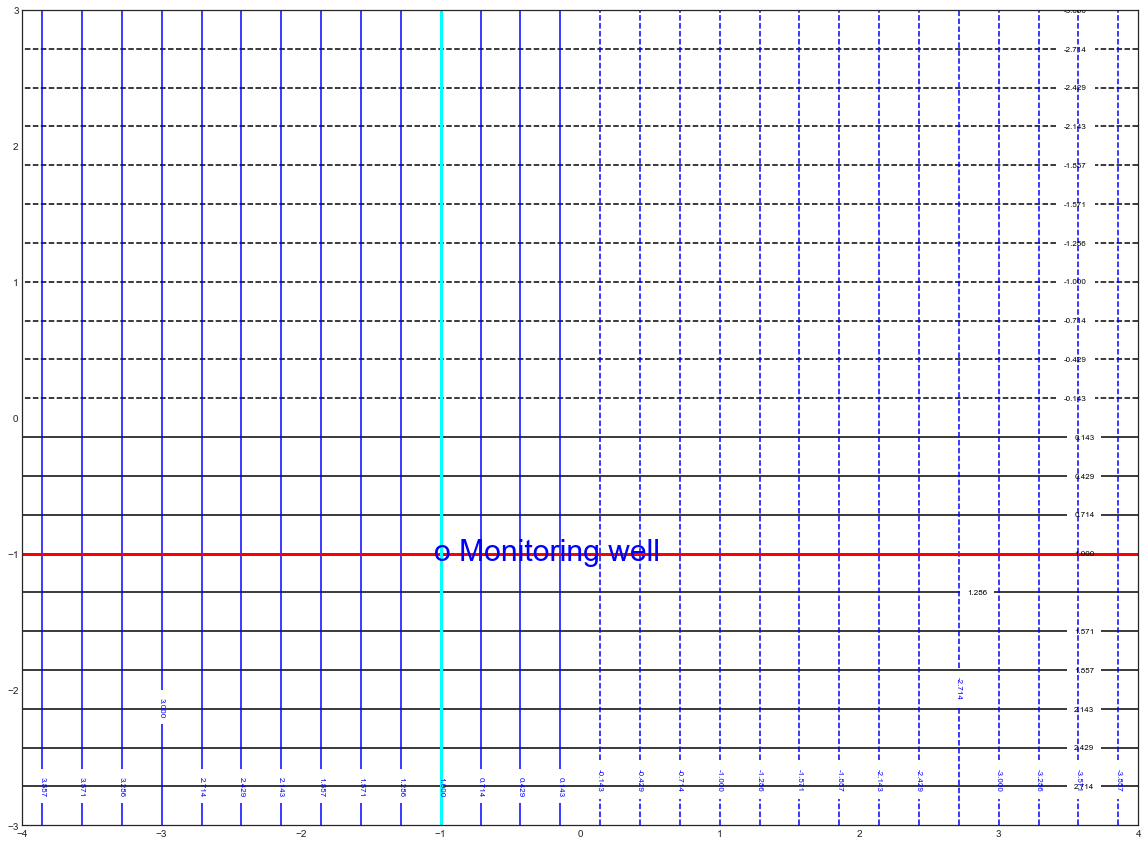

In [4]:
# create data
x = np.linspace(-4, 4, 250)
y = np.linspace(-3, 3, 250)

# this creates 2d arrays of x and y for evaluating functions of two variables, 
# since numpy arrays need to be the same size to do element-wise math.
X, Y = np.meshgrid(x, y)

# define the streamline and potential functions
Phi = -X
Psi = -Y

plt.figure(figsize=(20,15))
plt.xlim(-4, 4) # set the y and x limits to get rid of border around the data
plt.ylim(-3,3)

# add text to mark the well, first two arguments are (x, y) of bottom left corner of text
# box, needs to be adjusted to put the o near the actual well.
plt.text(-1.05,-1.05,'o Monitoring well',color='b',size=30) # note what color is used on the graph

# the streamlines and equipotentials are graphed with the contour function, which takes the X, Y, and Z coordinates, 
# and interpolates to draw contours at every place wher Z equals a value in 'levels'
streamlines = plt.contour(X, Y, Psi, levels=np.linspace(-7,7,50), colors='black')
equipotentials = plt.contour(X, Y, Phi, levels=np.linspace(-7,7,50), colors='blue')

# The return values are not the plotted lines per se, but 'handles' allowing us to change the lines
# the code below labels the contours with their values:
plt.clabel(streamlines, inline=True, fontsize=8)
plt.clabel(equipotentials, inline=True, fontsize=8)

# We will highlight specific streamlines and equipotential through the well, which is a Psi = Phi = 1
# `levels` is expected to be a list, so need brackets.
plt.contour(X, Y, Psi, levels=[1], colors='red', linewidths=3);
plt.contour(X, Y, Phi, levels=[1], colors='cyan', linewidths=3);

# save the figure
plt.savefig('UniformStream.png')

## Graphing Velocity
Recall the velocity at any point in a flow is given by the negative gradient of the potential function, or $\mathbf{V} = -\nabla\Phi$. For our example, the result is simple $<V_x, V_y>\ =\ <1, 0>$

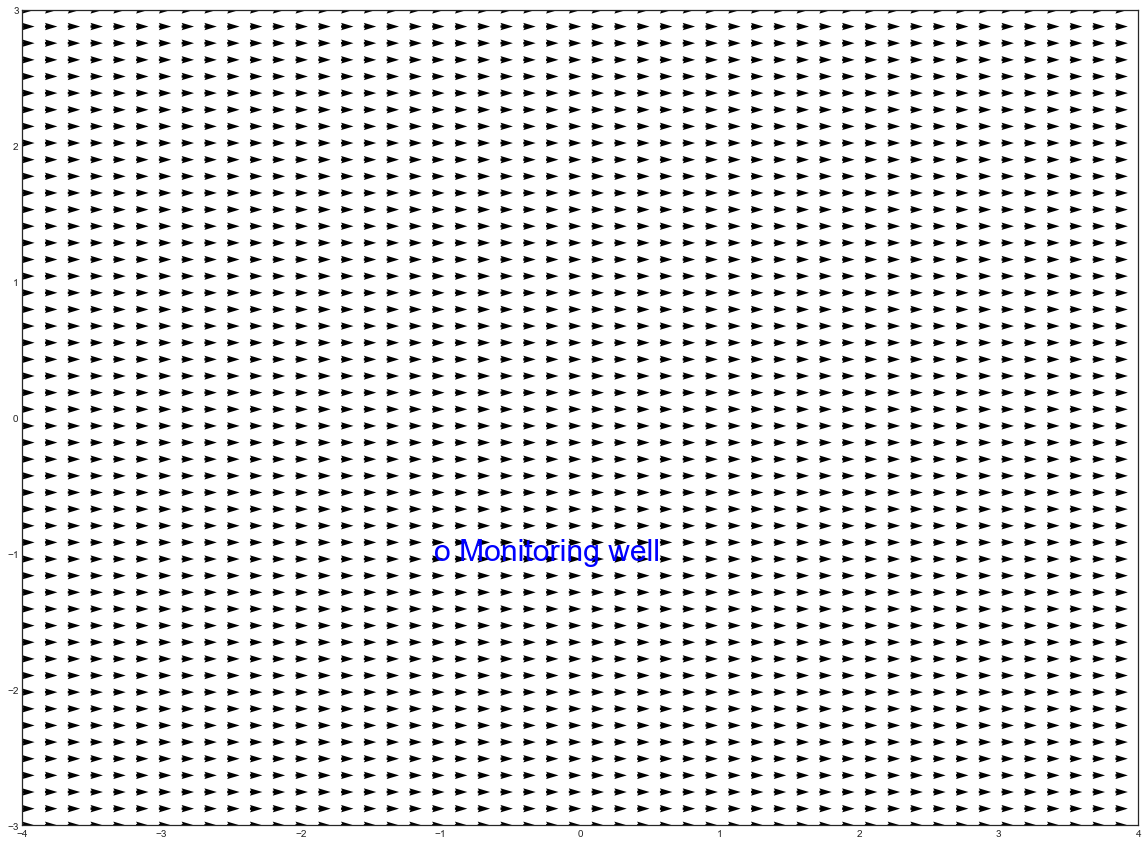

In [7]:
# X and Y are too densely clustered for this, so make new arrays
x = np.linspace(-4, 4, 50)
y = np.linspace(-3, 3, 50)
X1, Y1 = np.meshgrid(x, y)

Vx = np.ones(X1.shape)
Vy = np.zeros(X1.shape)

plt.figure(figsize=(20,15))
plt.xlim(-4, 4) # set the y and x limits to get rid of border around the data
plt.ylim(-3,3)

# add text to mark the well
plt.text(-1.05,-1.05,'o Monitoring well',color='b',size=30) # note what color is used on the graph

# the crucial command, not working yet.
plt.quiver(X1, Y1, Vx, Vy)

# save the figure
plt.savefig('UniformStream_velocity.png')

## Exercises
For each of the flow scenarios below, perform the following:

- Plot the equipotentials and streamlines for the scenario. Highlight any dividing streamlines. Label stagnation points with magenta circles, sources with red x and text, and sinks with green x and text description. Save the figure with a descriptive title.
- Plot the velocity field, include wells (sources and sinks) and stagnation points, and save the figure.

1. Flow into a high-capacity industrial well with $q_w/h = 2.19*10^{-7}\ \frac{m^2}{s}$, which is equivalent to 100,000 gallons/day if the well extends 20 m into the water table. Let the background flow be negligible and the well be located at (-1, 1). Remember to use the `arctan2` function to evaluate the angle.

In [ ]:
# streamlines and equipotential

In [ ]:
# velocity field

2. Uniform flow of $q_w/A = 3$ in the +x-direction, with a pollution source, $q_w/h = 1$, at (-1, 0), and extraction well, $q_w/h = 1.3$, at (2, -0.5)

In [ ]:
# streamlines and equipotential

In [8]:
# velocity field

3. Consider a uniform flow of $q_w/A = 1$ in the +x-direction, with a pollution source, $q_w/h = 3$, at the origin. A monitoring well is present at (3, 2). If an extraction well can be placed at (3, 0), what is the minimum extraction flow rate for which the monitoring well is clean? Graph the case for that flow rate and verify that the dividing streamline passes through the monitoring well.

In [ ]:
# streamlines and equipotential

In [ ]:
# velocity field

4. Reproduce Rankine's oval for a uniform flow in the negative y direction ($q_u/A=1$), $q_s/h = 3$ and $d=2$.

In [ ]:
# streamlines and equipotential

In [ ]:
# velocity field